<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
!pip install rich


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 22.1 MB/s eta 0:00:00


TRAIN DATASET SUMMARY

                                                  1. First 5 Rows                                                  
┏━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ id ┃ day ┃ pressu… ┃ maxte… ┃ tempar… ┃ minte… ┃ dewpoi… ┃ humid… ┃ cloud ┃ sunshi… ┃ windd… ┃ windsp… ┃ rainf… ┃
┡━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ 0  │  1  │ 1017.4  │  21.2  │  20.6   │  19.9  │  19.4   │  87.0  │ 88.0  │   1.1   │  60.0  │  17.2   │   1    │
├────┼─────┼─────────┼────────┼─────────┼────────┼─────────┼────────┼───────┼─────────┼────────┼─────────┼────────┤
│ 1  │  2  │ 1019.5  │  16.2  │  16.9   │  15.8  │  15.4   │  95.0  │ 91.0  │   0.0   │  50.0  │  21.9   │   1    │
├────┼─────┼─────────┼────────┼─────────┼────────┼─────────┼────────┼───────┼─────────┼────────┼─────────┼────────┤
│ 2  │  3  │ 1024.1  │  19.4  │  16.1   │  14.6  │   9.3   │  75.0  │ 47.0  │   8.3   │  70.0  │  18.1   │   1    │
├────┼─────┼─────────┼────────┼─────────┼────────┼─────────┼────────┼───────┼─────────┼────────┼─────────┼────────┤
│ 3  │  4  │ 1013.4  │  18.1  │  17.8   │  16.9  │  16.8   │  95.0  │ 95.0  │   0.0   │  60.0  │  35.6   │   1    │
├────┼─────┼─────────┼────────┼─────────┼────────┼─────────┼────────┼───────┼─────────┼────────┼─────────┼────────┤
│ 4  │  5  │ 1021.8  │  21.3  │  18.4   │  15.2  │   9.6   │  52.0  │ 45.0  │   3.6   │  40.0  │  24.8   │   0    │
└────┴─────┴─────────┴────────┴─────────┴────────┴─────────┴────────┴───────┴─────────┴────────┴─────────┴────────┘

              2. Dataset Info               
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃    Column     ┃ Non-Null Count ┃  Dtype  ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      id       │      2190      │  int64  │
├───────────────┼────────────────┼─────────┤
│      day      │      2190      │  int64  │
├───────────────┼────────────────┼─────────┤
│   pressure    │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│    maxtemp    │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│  temparature  │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│    mintemp    │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│   dewpoint    │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│   humidity    │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│     cloud     │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│   sunshine    │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│ winddirection │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│   windspeed   │      2190      │ float64 │
├───────────────┼────────────────┼─────────┤
│   rainfall    │      2190      │  int64  │
└───────────────┴────────────────┴─────────┘

                 3. Descriptive Statistics (Transposed)                  
┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ count  ┃  mean  ┃  std   ┃  min  ┃  25%   ┃  50%   ┃   75%   ┃  max   ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ 2190.0 │ 1094.5 │ 632.34 │  0.0  │ 547.25 │ 1094.5 │ 1641.75 │ 2189.0 │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 179.95 │ 105.2  │  1.0  │  89.0  │ 178.5  │  270.0  │ 365.0  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 1013.6 │  5.66  │ 999.0 │ 1008.6 │ 1013.0 │ 1017.78 │ 1034.6 │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 26.37  │  5.65  │ 10.4  │  21.3  │  27.8  │  31.2   │  36.0  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 23.95  │  5.22  │  7.4  │  19.3  │  25.5  │  28.4   │  31.5  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 22.17  │  5.06  │  4.0  │  17.7  │ 23.85  │  26.4   │  29.8  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 20.45  │  5.29  │ -0.3  │  16.8  │ 22.15  │  25.0   │  26.7  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 82.04  │  7.8   │ 39.0  │  77.0  │  82.0  │  88.0   │  98.0  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 75.72  │ 18.03  │  2.0  │  69.0  │  83.0  │  88.0   │ 100.0  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │  3.74  │  3.63  │  0.0  │  0.4   │  2.4   │   6.8   │  12.1  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │ 104.86 │  80.0  │ 10.0  │  40.0  │  70.0  │  200.0  │ 300.0  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │  21.8  │  9.9   │  4.4  │ 14.12  │  20.5  │  27.9   │  59.5  │
├────────┼────────┼────────┼───────┼────────┼────────┼─────────┼────────┤
│ 2190.0 │  0.75  │  0.43  │  0.0  │  1.0   │  1.0   │   1.0   │  1.0   │
└────────┴────────┴────────┴───────┴────────┴────────┴─────────┴────────┘

        4. Null Values        
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃    Column     ┃ Null Count ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│      id       │     0      │
├───────────────┼────────────┤
│      day      │     0      │
├───────────────┼────────────┤
│   pressure    │     0      │
├───────────────┼────────────┤
│    maxtemp    │     0      │
├───────────────┼────────────┤
│  temparature  │     0      │
├───────────────┼────────────┤
│    mintemp    │     0      │
├───────────────┼────────────┤
│   dewpoint    │     0      │
├───────────────┼────────────┤
│   humidity    │     0      │
├───────────────┼────────────┤
│     cloud     │     0      │
├───────────────┼────────────┤
│   sunshine    │     0      │
├───────────────┼────────────┤
│ winddirection │     0      │
├───────────────┼────────────┤
│   windspeed   │     0      │
├───────────────┼────────────┤
│   rainfall    │     0      │
└───────────────┴────────────┘

TEST DATASET SUMMARY

                                                  1. First 5 Rows                                                  
┏━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃  id  ┃ day ┃ pressu… ┃ maxtemp ┃ tempara… ┃ mintemp ┃ dewpoi… ┃ humidity ┃ cloud ┃ sunshi… ┃ winddir… ┃ windsp… ┃
┡━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│ 2190 │  1  │ 1019.5  │  17.5   │   15.8   │  12.7   │  14.9   │   96.0   │ 99.0  │   0.0   │   50.0   │  24.3   │
├──────┼─────┼─────────┼─────────┼──────────┼─────────┼─────────┼──────────┼───────┼─────────┼──────────┼─────────┤
│ 2191 │  2  │ 1016.5  │  17.5   │   16.5   │  15.8   │  15.1   │   97.0   │ 99.0  │   0.0   │   50.0   │  35.3   │
├──────┼─────┼─────────┼─────────┼──────────┼─────────┼─────────┼──────────┼───────┼─────────┼──────────┼─────────┤
│ 2192 │  3  │ 1023.9  │  11.2   │   10.4   │   9.4   │   8.9   │   86.0   │ 96.0  │   0.0   │   40.0   │  16.9   │
├──────┼─────┼─────────┼─────────┼──────────┼─────────┼─────────┼──────────┼───────┼─────────┼──────────┼─────────┤
│ 2193 │  4  │ 1022.9  │  20.6   │   17.3   │  15.2   │   9.5   │   75.0   │ 45.0  │   7.1   │   20.0   │  50.6   │
├──────┼─────┼─────────┼─────────┼──────────┼─────────┼─────────┼──────────┼───────┼─────────┼──────────┼─────────┤
│ 2194 │  5  │ 1022.2  │  16.1   │   13.8   │   6.4   │   4.3   │   68.0   │ 49.0  │   9.2   │   20.0   │  19.4   │
└──────┴─────┴─────────┴─────────┴──────────┴─────────┴─────────┴──────────┴───────┴─────────┴──────────┴─────────┘

              2. Dataset Info               
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃    Column     ┃ Non-Null Count ┃  Dtype  ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│      id       │      730       │  int64  │
├───────────────┼────────────────┼─────────┤
│      day      │      730       │  int64  │
├───────────────┼────────────────┼─────────┤
│   pressure    │      730       │ float64 │
├───────────────┼────────────────┼─────────┤
│    maxtemp    │      730       │ float64 │
├───────────────┼────────────────┼─────────┤
│  temparature  │      730       │ float64 │
├───────────────┼────────────────┼─────────┤
│    mintemp    │      730       │ float64 │
├───────────────┼────────────────┼─────────┤
│   dewpoint    │      730       │ float64 │
├───────────────┼────────────────┼─────────┤
│   humidity    │      730       │ float64 │
├───────────────┼────────────────┼─────────┤
│     cloud     │      730       │ float64 │
├───────────────┼────────────────┼─────────┤
│   sunshine    │      730       │ float64 │
├───────────────┼────────────────┼─────────┤
│ winddirection │      729       │ float64 │
├───────────────┼────────────────┼─────────┤
│   windspeed   │      730       │ float64 │
└───────────────┴────────────────┴─────────┘

                  3. Descriptive Statistics (Transposed)                  
┏━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ count ┃  mean  ┃  std   ┃  min   ┃   25%   ┃  50%   ┃   75%   ┃  max   ┃
┡━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ 730.0 │ 2554.5 │ 210.88 │ 2190.0 │ 2372.25 │ 2554.5 │ 2736.75 │ 2919.0 │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 183.0  │ 105.44 │  1.0   │  92.0   │ 183.0  │  274.0  │ 365.0  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 1013.5 │  5.51  │ 1000.0 │ 1008.72 │ 1012.7 │ 1017.6  │ 1032.2 │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 26.37  │  5.67  │  7.4   │  21.6   │  27.8  │  31.0   │  35.8  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 23.96  │  5.28  │  5.9   │  19.82  │ 25.65  │  28.38  │  31.8  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 22.11  │  5.17  │  4.2   │  17.82  │  23.9  │  26.4   │  29.1  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 20.46  │  5.39  │  -0.0  │  16.8   │  22.3  │  25.0   │  26.7  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 82.67  │  7.82  │  39.0  │  77.25  │  82.0  │  89.0   │  98.0  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 76.36  │ 17.93  │  0.0   │  69.0   │  83.0  │  88.0   │ 100.0  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │  3.66  │  3.64  │  0.0   │  0.32   │  2.2   │  6.68   │  11.8  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 729.0 │ 103.92 │  81.7  │  10.0  │  40.0   │  70.0  │  200.0  │ 300.0  │
├───────┼────────┼────────┼────────┼─────────┼────────┼─────────┼────────┤
│ 730.0 │ 22.48  │  9.95  │  4.5   │  14.5   │  21.3  │  28.4   │  59.5  │
└───────┴────────┴────────┴────────┴─────────┴────────┴─────────┴────────┘

        4. Null Values        
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃    Column     ┃ Null Count ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│      id       │     0      │
├───────────────┼────────────┤
│      day      │     0      │
├───────────────┼────────────┤
│   pressure    │     0      │
├───────────────┼────────────┤
│    maxtemp    │     0      │
├───────────────┼────────────┤
│  temparature  │     0      │
├───────────────┼────────────┤
│    mintemp    │     0      │
├───────────────┼────────────┤
│   dewpoint    │     0      │
├───────────────┼────────────┤
│   humidity    │     0      │
├───────────────┼────────────┤
│     cloud     │     0      │
├───────────────┼────────────┤
│   sunshine    │     0      │
├───────────────┼────────────┤
│ winddirection │     1      │
├───────────────┼────────────┤
│   windspeed   │     0      │
└───────────────┴────────────┘

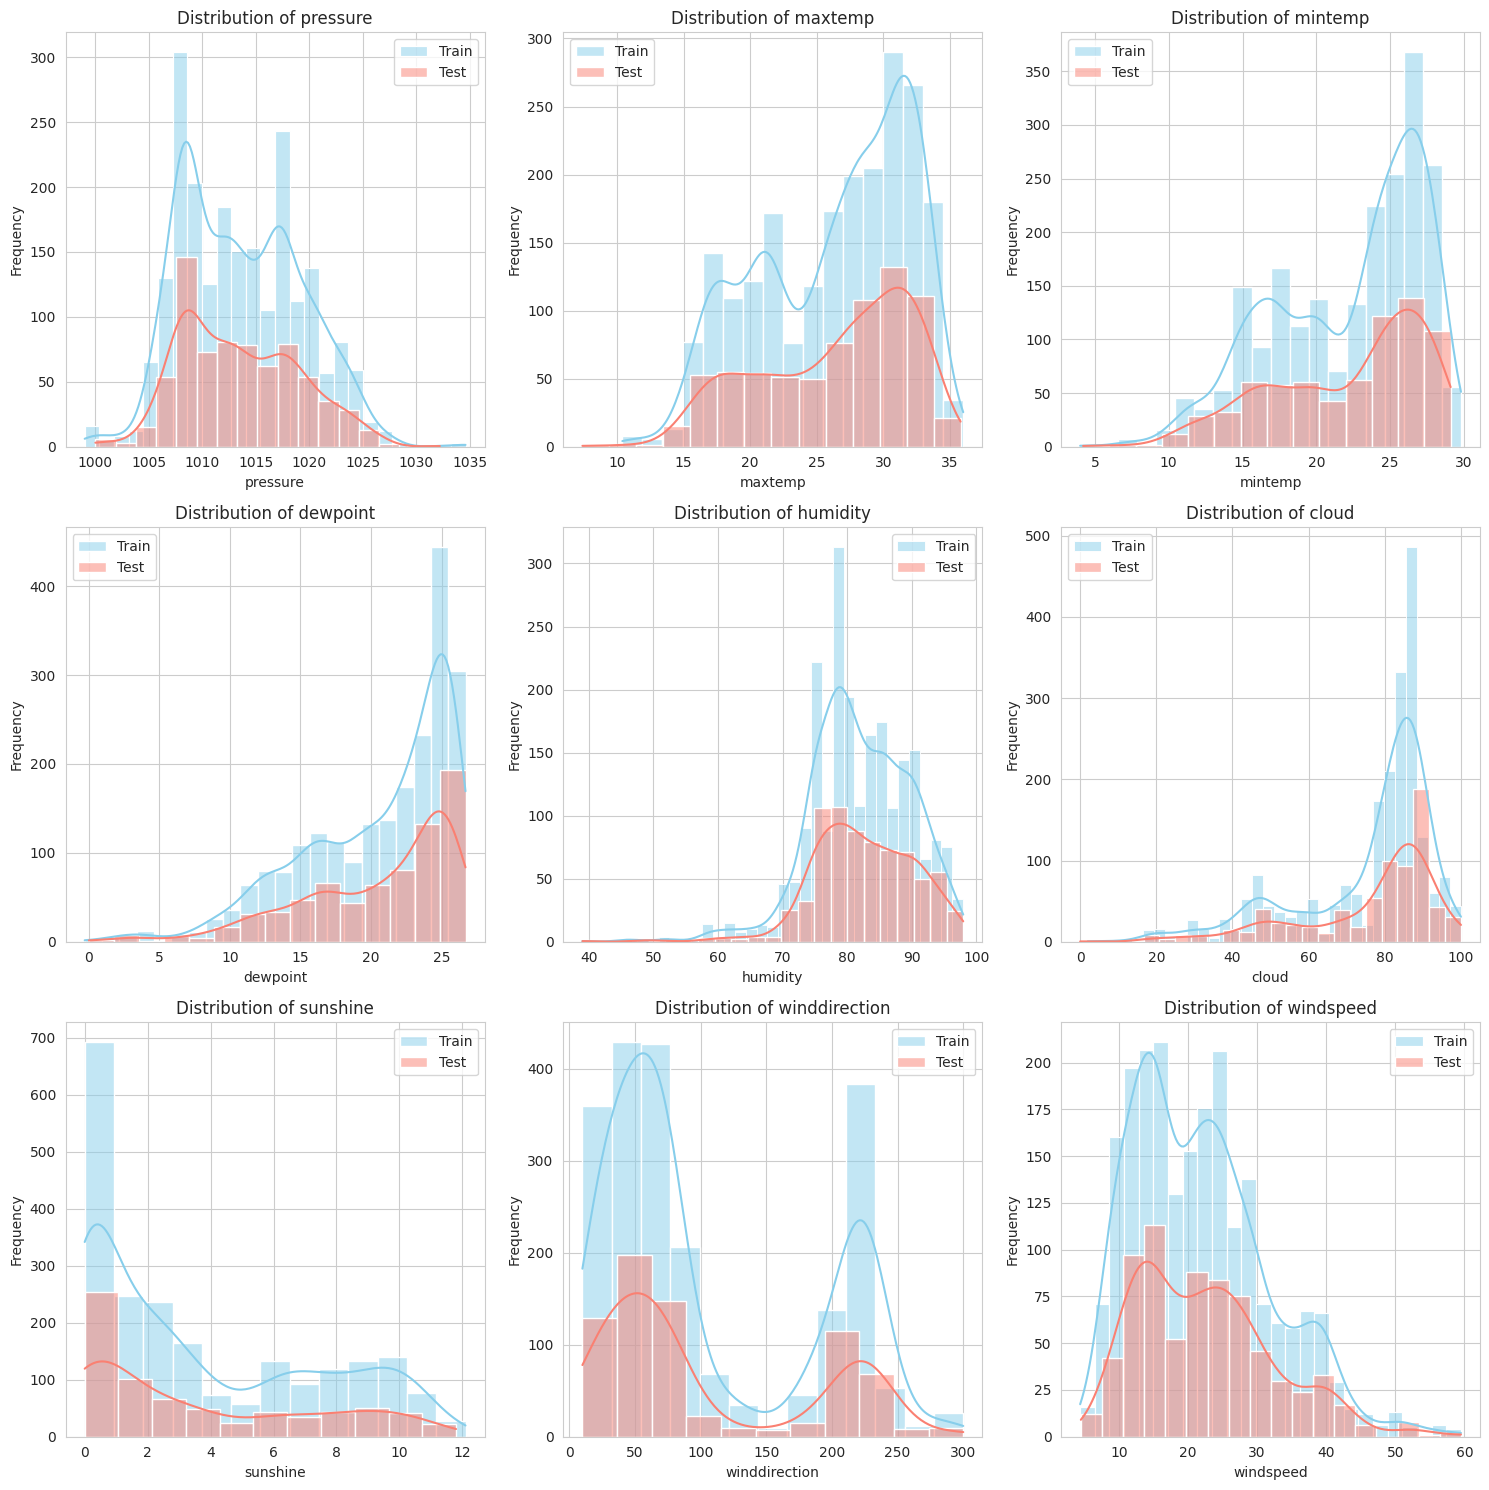

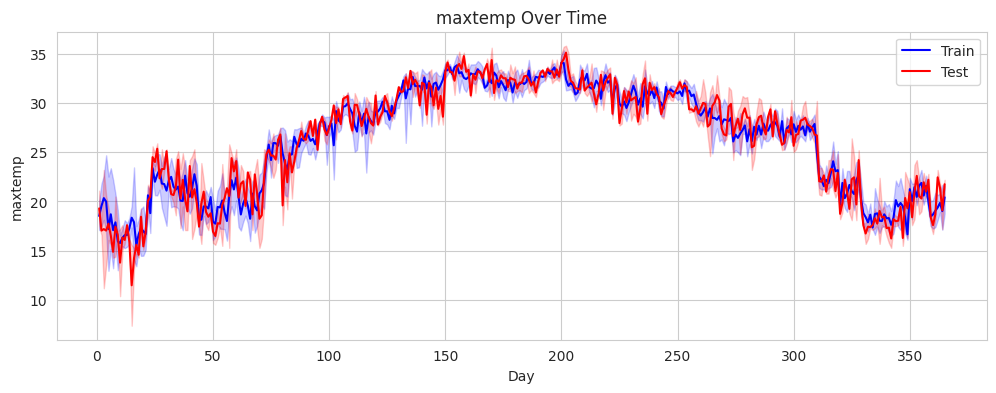

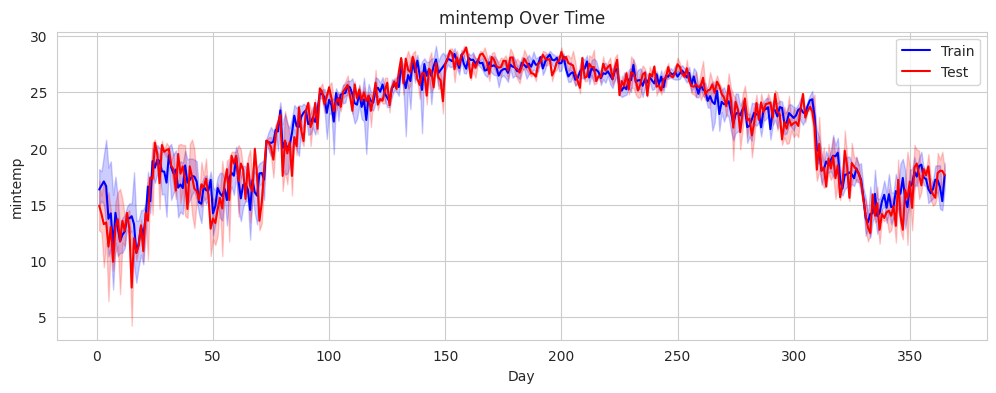

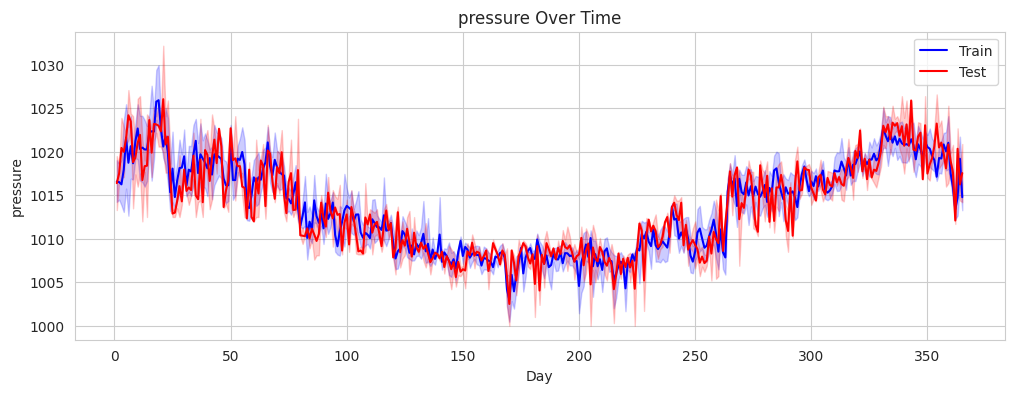

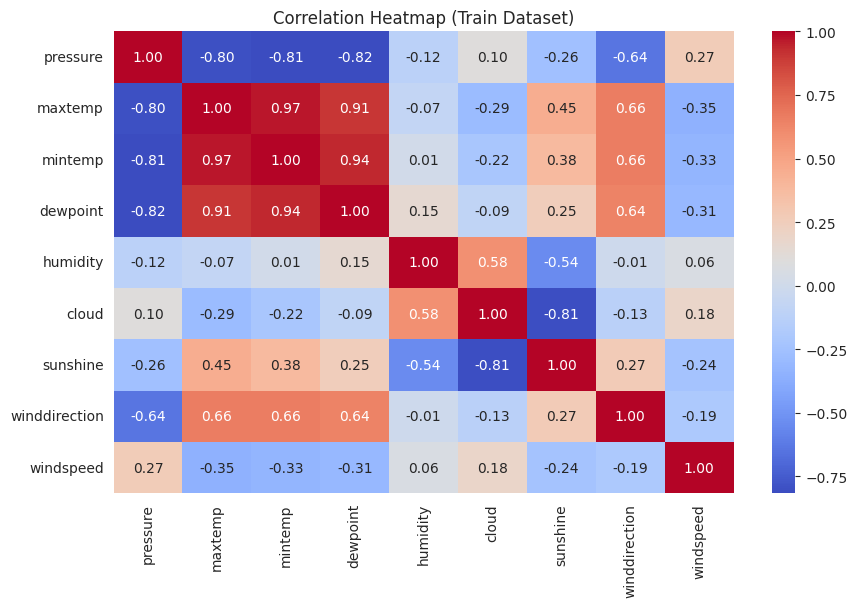

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       119
           1       0.87      0.92      0.90       319

    accuracy                           0.85       438
   macro avg       0.82      0.78      0.80       438
weighted avg       0.84      0.85      0.84       438

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       119
           1       0.86      0.93      0.89       319

    accuracy                           0.84       438
   macro avg       0.81      0.76      0.78       438
weighted avg       0.83      0.84      0.83       438

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.57      0.66       119
           1       0.85      0.94      0.89       319

    accuracy                           0.84       438
   macro avg       0.81     

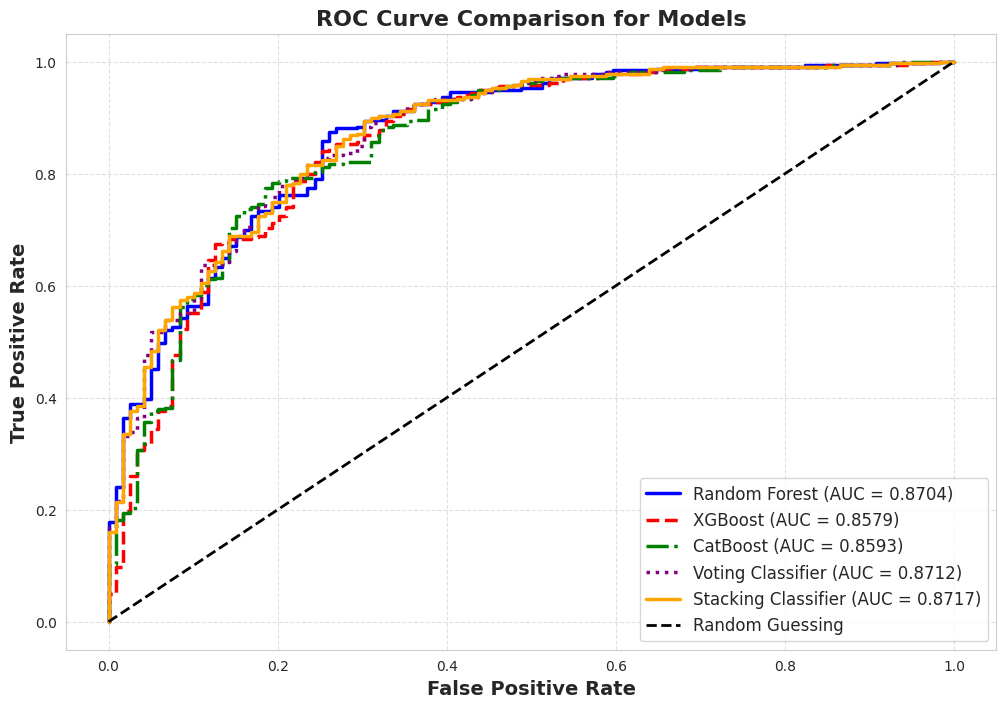

The best model is: Stacking Classifier with ROC-AUC = 0.8717


In [2]:

#Import libraries

# Console for Rich Formatting
from rich.console import Console
from rich.table import Table

# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Model Evaluation
from sklearn.metrics import classification_report, roc_curve, auc

# Tabular Display
from tabulate import tabulate

# Initialize console for rich output
console = Console()


# Load datasets
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Function to display DataFrame in a table
def display_rich_table(df, title, header_color="cyan"):
    table = Table(title=f"[bold underline]{title}[/bold underline]", show_lines=True)

    # Add columns with styles
    for col in df.columns:
        table.add_column(str(col), style=header_color, justify="center")

    # Add rows
    for row in df.itertuples(index=False):
        table.add_row(*[str(item) for item in row])

    console.print(table)

# Function to inspect datasets
def inspect_data(train, test):

    # Load datasets
    if isinstance(train, str):
        train = pd.read_csv(train)
    if isinstance(test, str):
        test = pd.read_csv(test)

    # Summarize train dataset
    console.print("\n[bold magenta]TRAIN DATASET SUMMARY[/bold magenta]", justify="center")

    # Display the first 5 rows
    display_rich_table(train.head(), "1. First 5 Rows", header_color="green")

    # Display dataset information
    info_df = pd.DataFrame({
        'Column': train.columns,
        'Non-Null Count': train.notnull().sum(),
        'Dtype': train.dtypes.astype(str)
    })
    display_rich_table(info_df, "2. Dataset Info", header_color="blue")

    # Display descriptive statistics (transposed)
    describe_df = train.describe(include='all').T.round(2)
    display_rich_table(describe_df, "3. Descriptive Statistics (Transposed)", header_color="yellow")

    # Display null values
    null_df = pd.DataFrame({
        'Column': train.columns,
        'Null Count': train.isnull().sum()
    })
    display_rich_table(null_df, "4. Null Values", header_color="red")

    console.print("\n[bold magenta]TEST DATASET SUMMARY[/bold magenta]", justify="center")

    # Display the first 5 rows
    display_rich_table(test.head(), "1. First 5 Rows", header_color="green")

    # Display dataset information
    info_df = pd.DataFrame({
        'Column': test.columns,
        'Non-Null Count': test.notnull().sum(),
        'Dtype': test.dtypes.astype(str)
    })
    display_rich_table(info_df, "2. Dataset Info", header_color="blue")

    # Display descriptive statistics (transposed)
    describe_df = test.describe(include='all').T.round(2)
    display_rich_table(describe_df, "3. Descriptive Statistics (Transposed)", header_color="yellow")

    # Display null values
    null_df = pd.DataFrame({
        'Column': test.columns,
        'Null Count': test.isnull().sum()
    })
    display_rich_table(null_df, "4. Null Values", header_color="red")


# Paths to datasets
train_path = '/content/train.csv'
test_path = '/content/test.csv'

# Run the function
inspect_data(train_path, test_path)


# Visualize

# Set a clean style for plots
sns.set_style("whitegrid")

# Histograms for numeric features
numeric_features = ['pressure', 'maxtemp', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

# Define number of rows and columns for subplots
cols = 3
rows = int(np.ceil(len(numeric_features) / cols))

# Create subplots with 3 histograms per row
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(train[feature], color='skyblue', label='Train', kde=True, ax=axes[i])
    sns.histplot(test[feature], color='salmon', label='Test', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Remove empty subplots if the number of features isn't a multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Line plots for time-series features (e.g., 'day')
time_series_features = ['maxtemp', 'mintemp', 'pressure']

for feature in time_series_features:
    plt.figure(figsize=(12, 4))
    sns.lineplot(x=train['day'], y=train[feature], color='blue', label='Train')
    sns.lineplot(x=test['day'], y=test[feature], color='red', label='Test')
    plt.title(f'{feature} Over Time')
    plt.xlabel('Day')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Correlation heatmap for numeric features in the train dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Train Dataset)')
plt.show()

# Handle missing values with KNN Imputation
# Fit the imputer on the training data without the 'rainfall' column
imputer = KNNImputer(n_neighbors=5)
train_imputed = imputer.fit_transform(train.drop(columns=['rainfall']))
test_imputed = imputer.transform(test)

# Convert back to DataFrames
train_imputed_df = pd.DataFrame(train_imputed, columns=train.drop(columns=['rainfall']).columns)
test_imputed_df = pd.DataFrame(test_imputed, columns=test.columns)

# Add the 'rainfall' column back to the training data
train_imputed_df['rainfall'] = train['rainfall'].values

# Replace the original data with the imputed data
train = train_imputed_df
test = test_imputed_df

# Feature Engineering for training and test sets
for df in [train, test]:
    df["dew_humidity"] = df["dewpoint"] * df["humidity"]
    df["cloud_windspeed"] = df["cloud"] * df["windspeed"]
    df["cloud_to_humidity"] = df["cloud"] / df["humidity"]
    df["temp_to_sunshine"] = df["sunshine"] / df["temparature"]
    df.fillna(df.median(), inplace=True)  # Fallback to median imputation

# Define the threshold for rainfall classification
rainfall_threshold = 0.1  # example threshold in mm
train['rainfall_class'] = (train['rainfall'] > rainfall_threshold).astype(int)

# Define features and target variable
X = train.drop(['rainfall', 'rainfall_class', 'id', 'day'], axis=1)
y = train['rainfall_class']

# Check for duplicate columns
if X.columns.duplicated().any():
    print("Duplicate columns found:")
    print(X.columns[X.columns.duplicated()])
    X = X.loc[:, ~X.columns.duplicated()]
    test = test.loc[:, ~test.columns.duplicated()]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test.drop(['id', 'day'], axis=1))

# Train-Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Random Forest Model with Grid Search and Regularization
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,  # Reduce the number of trees
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Require more samples to split a node
    class_weight={0: 1, 1: 5}  # Handle class imbalance
)
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc')
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# XGBoost Model with RandomizedSearchCV and Regularization
xgb_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=5,  # Handle class imbalance
    max_depth=6,  # Limit tree depth
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.1  # L2 regularization
)
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_random_search = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
xgb_random_search.fit(X_train_resampled, y_train_resampled)

# CatBoost Model with Regularization
catboost_model = CatBoostClassifier(
    iterations=100,
    depth=10,
    learning_rate=0.1,
    random_seed=42,
    verbose=0,
    scale_pos_weight=5,  # Handle class imbalance
    l2_leaf_reg=0.1  # L2 regularization
)
catboost_model.fit(X_train_resampled, y_train_resampled)

# Voting Classifier (Ensemble)
voting_model = VotingClassifier(estimators=[
    ('rf', rf_grid_search.best_estimator_),
    ('xgb', xgb_random_search.best_estimator_),
    ('catboost', catboost_model)
], voting='soft')
voting_model.fit(X_train_resampled, y_train_resampled)

# Stacking Classifier (Ensemble)
stacking_model = StackingClassifier(estimators=[
    ('rf', rf_grid_search.best_estimator_),
    ('xgb', xgb_random_search.best_estimator_),
    ('catboost', catboost_model)
], final_estimator=LogisticRegression(), stack_method='predict_proba')
stacking_model.fit(X_train_resampled, y_train_resampled)

# Model Predictions (Probabilities)
rf_proba = rf_grid_search.predict_proba(X_valid)[:, 1]
xgb_proba = xgb_random_search.predict_proba(X_valid)[:, 1]
catboost_proba = catboost_model.predict_proba(X_valid)[:, 1]
voting_proba = voting_model.predict_proba(X_valid)[:, 1]
stacking_proba = stacking_model.predict_proba(X_valid)[:, 1]

# Evaluation and Reporting
print("Random Forest Classification Report:")
print(classification_report(y_valid, rf_grid_search.predict(X_valid)))

print("XGBoost Classification Report:")
print(classification_report(y_valid, xgb_random_search.predict(X_valid)))

print("CatBoost Classification Report:")
print(classification_report(y_valid, catboost_model.predict(X_valid)))

print("Voting Classifier Classification Report:")
print(classification_report(y_valid, voting_model.predict(X_valid)))

print("Stacking Classifier Classification Report:")
print(classification_report(y_valid, stacking_model.predict(X_valid)))

# ROC Curves for Model Comparison
fpr_rf, tpr_rf, _ = roc_curve(y_valid, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_valid, xgb_proba)
fpr_catboost, tpr_catboost, _ = roc_curve(y_valid, catboost_proba)
fpr_voting, tpr_voting, _ = roc_curve(y_valid, voting_proba)
fpr_stacking, tpr_stacking, _ = roc_curve(y_valid, stacking_proba)

# Define Colors & Line Styles
model_curves = {
    "Random Forest": (fpr_rf, tpr_rf, 'blue', '-'),
    "XGBoost": (fpr_xgb, tpr_xgb, 'red', '--'),
    "CatBoost": (fpr_catboost, tpr_catboost, 'green', '-.'),
    "Voting Classifier": (fpr_voting, tpr_voting, 'purple', ':'),
    "Stacking Classifier": (fpr_stacking, tpr_stacking, 'orange', '-')
}

# Plot ROC Curves
plt.figure(figsize=(12, 8))

for model, (fpr, tpr, color, linestyle) in model_curves.items():
    plt.plot(fpr, tpr, color=color, linestyle=linestyle, linewidth=2.5,
             label=f'{model} (AUC = {auc(fpr, tpr):.4f})')

# Plot Baseline (Random Guessing)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2, label='Random Guessing')

# Formatting
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve Comparison for Models', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


# Compare ROC-AUC scores of all models
model_scores = {
    'Random Forest': auc(fpr_rf, tpr_rf),
    'XGBoost': auc(fpr_xgb, tpr_xgb),
    'CatBoost': auc(fpr_catboost, tpr_catboost),
    'Voting Classifier': auc(fpr_voting, tpr_voting),
    'Stacking Classifier': auc(fpr_stacking, tpr_stacking)
}

# Find the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]
print(f"The best model is: {best_model_name} with ROC-AUC = {best_model_score:.4f}")

# Predict probabilities on test data using the best model
if best_model_name == 'Random Forest':
    best_model = rf_grid_search.best_estimator_
    test_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
elif best_model_name == 'XGBoost':
    best_model = xgb_random_search.best_estimator_
    test_proba = best_model.predict_proba(X_test_scaled)[:, 1]
elif best_model_name == 'CatBoost':
    best_model = catboost_model
    test_proba = best_model.predict_proba(X_test_scaled)[:, 1]
elif best_model_name == 'Voting Classifier':
    best_model = voting_model
    test_proba = best_model.predict_proba(X_test_scaled)[:, 1]
elif best_model_name == 'Stacking Classifier':
    best_model = stacking_model
    test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Save probabilities to a CSV file
test['rainfall'] = test_proba
test[['id', 'rainfall']].to_csv('/content/submission.csv', index=False)